In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
import sklearn.datasets as ds

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
X,y=fetch_openml("credit-g",
                 return_X_y=True,
                 as_frame=True,
                 parser="auto")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning:

Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.



In [ ]:
X.head(5)

checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  residence_since  \
0                       4         male single          none                4   
1                       2  female div/dep/mar          none                2   
2                       2         male single          none                3   
3                       2         male single     guarantor                4   
4                       3         male single          none                4   

  property_magnitude  age other_payment_plans   housing  existing_credits  \
0        real estate   67                none       own                 2   
1        real estate   22                none       own                 1   
2        real estate   49                none       own                 1   
3     life insurance   45                none  for free                 1   
4  no known property   53                none  for free                 2   

                  job  num_dependents own_telephone foreign_worker  
0             skilled               1           yes            yes  
1             skilled               1          none            yes  
2  unskilled resident               2          none            yes  
3             skilled               2          none            yes  
4             skilled               2          none            yes

In [ ]:
X.checking_status.unique()

['<0', '0<=X<200', 'no checking', '>=200']
Categories (4, object): ['0<=X<200', '<0', '>=200', 'no checking']

In [ ]:
def fill_statis(row):
      if row['checking_status'] == '<0':
            return 1

      if row['checking_status'] =='0<=X<200' :
            return 2

      if row['checking_status'] == 'no checking':
            return 0

      if row['checking_status'] == '>=200':
            return 0

      return row['checking_status']


In [ ]:
X.checking_status=X.apply(fill_statis, axis=1).astype("category")

In [ ]:
X.employment.unique()

['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1']
Categories (5, object): ['1<=X<4', '4<=X<7', '<1', '>=7', 'unemployed']

In [ ]:
X.savings_status.unique()

['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500']
Categories (5, object): ['100<=X<500', '500<=X<1000', '<100', '>=1000', 'no known savings']

наверно проблема с кадировкой , но мы можем приминить OrdinalEncoder так как скорее всего при изменении кодировки  ни очень будет изменение дальше


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   int64   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   int64   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.analyticsvidhya.com/blog/2021/06/generate-reports-using-pandas-profiling-deploy-using-streamlit/

используем наши преимущества от ProfileRefort для анализа данных

In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-11-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile = ProfileReport(X)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import seaborn as sns

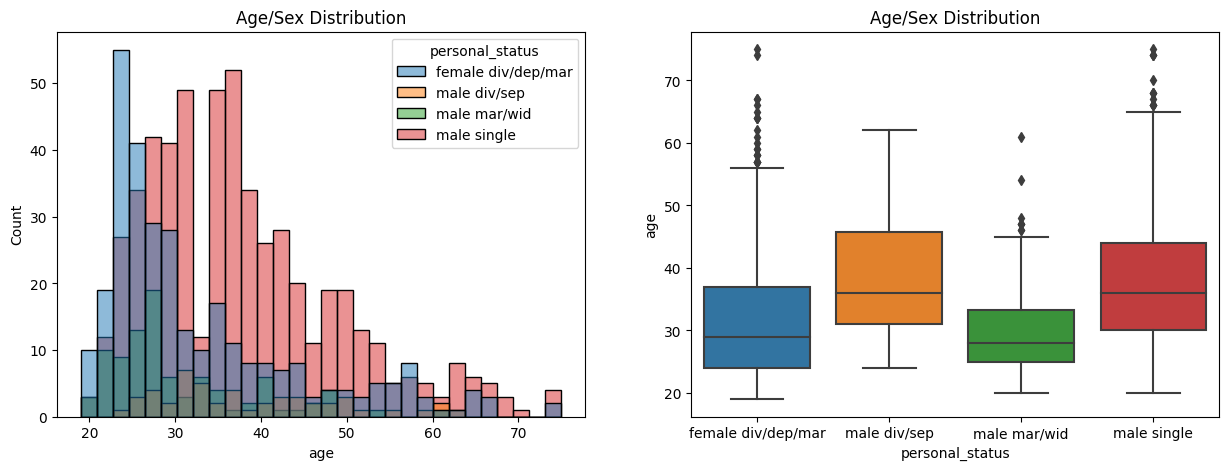

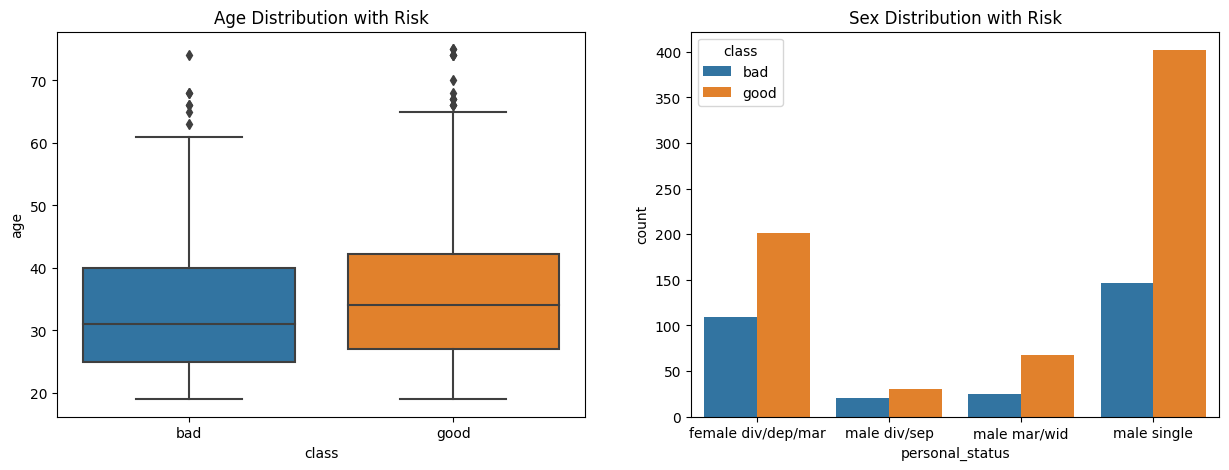

In [ ]:
X_=pd.concat([X,y],axis=1)
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(X_, x='age', bins=30, hue="personal_status", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=X_, x="personal_status", y="age", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=X_, x='class', y='age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=X_, x="personal_status", hue="class", ax=ax[1]).set_title("Sex Distribution with Risk");

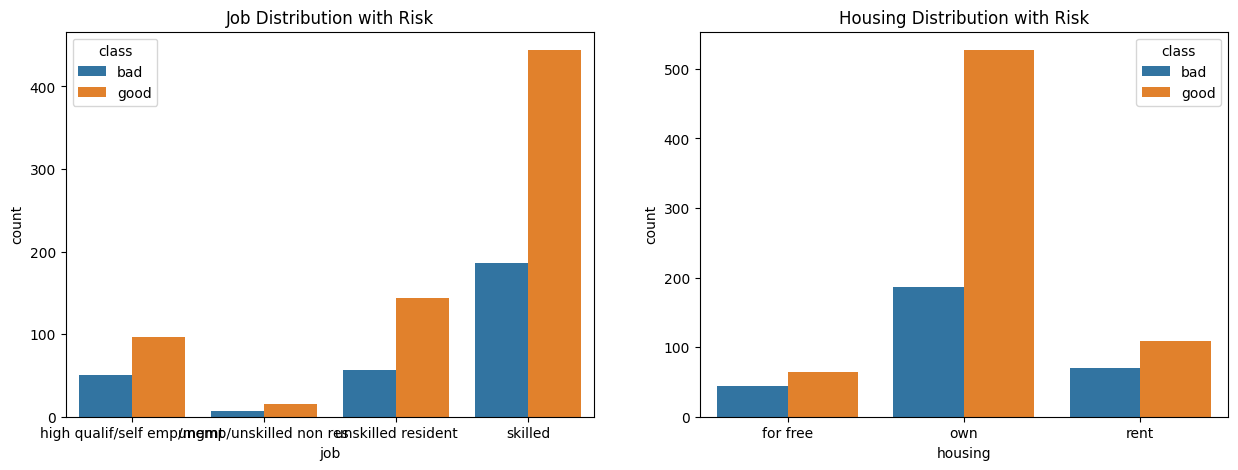

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=X_, x="job", hue="class", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=X_, x="housing", hue="class", ax=ax[1]).set_title("Housing Distribution with Risk");

<ipython-input-16-e97ba38509f4>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g2 = sns.distplot(X_["duration"][X_["class"]=="good"], color='g')
<ipython-input-16-e97ba38509f4>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g2 = sns.distplot(X_["duration"][X_["class"]=="bad"], color='r')


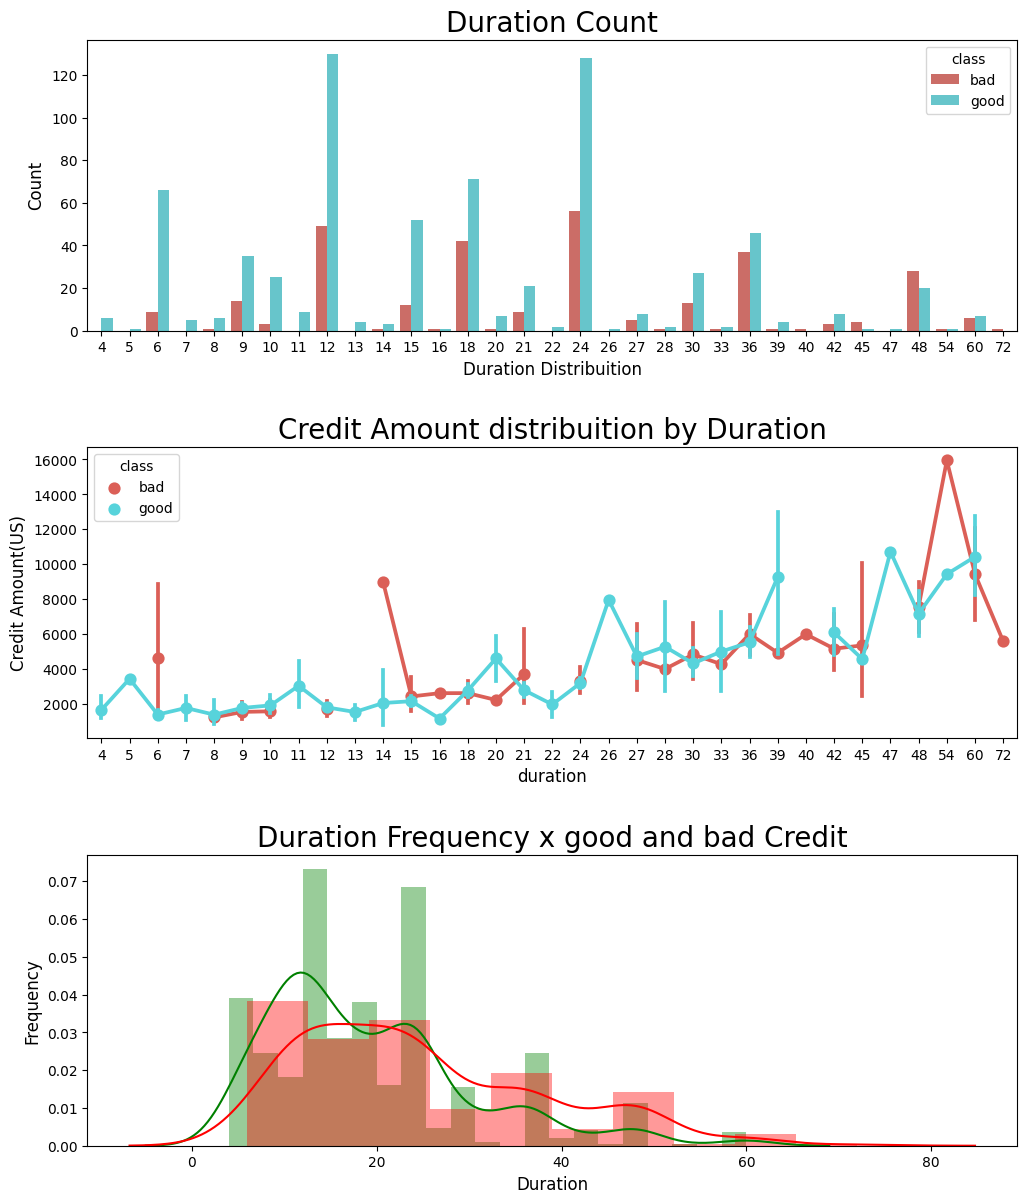

In [ ]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="duration", data=X_,
              palette="hls",  hue = "class")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="duration", y ="credit_amount",data=X_,
                   hue="class", palette="hls")
g1.set_xlabel("duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(X_["duration"][X_["class"]=="good"], color='g')
g2 = sns.distplot(X_["duration"][X_["class"]=="bad"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

In [ ]:
date_int = ["purpose", 'personal_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(X_[date_int[0]], X_[date_int[1]]).style.background_gradient(cmap = cm)

In [ ]:

num_cols =X.select_dtypes(include=np.number).columns
cat_cols = X.columns[X.dtypes == 'category']

print(f"We have {len(num_cols)} numeric columns: {', '.join(num_cols)}")
print(f"And {len(cat_cols)} categorical columns: {', '.join(cat_cols)}")

We have 7 numeric columns: duration, credit_amount, installment_commitment, residence_since, age, existing_credits, num_dependents
And 13 categorical columns: checking_status, credit_history, purpose, savings_status, employment, personal_status, other_parties, property_magnitude, other_payment_plans, housing, job, own_telephone, foreign_worker


<ipython-input-19-a09ba25c1ac6>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\


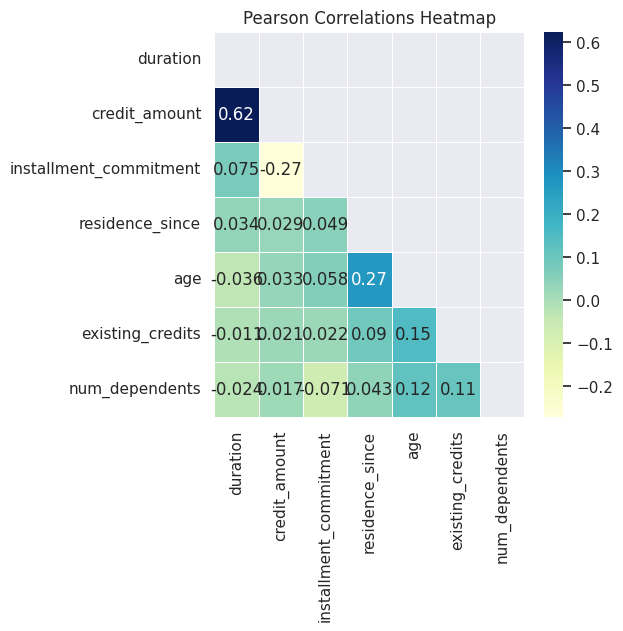

In [ ]:
corr = X[num_cols].corr()
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline

In [ ]:
cat_pipe_ordinal = Pipeline([
    ('encoder', OrdinalEncoder( ))
])

numerical_pipe = Pipeline([
    ('scaler', StandardScaler())
])

preprocessors_ = ColumnTransformer(transformers=[
    ('num', numerical_pipe, num_cols),
    ('cat', cat_pipe_ordinal, cat_cols)
])

pipe = Pipeline([
    ('preprocessors', preprocessors_)
])


In [ ]:
X_2=pd.DataFrame(pipe.fit_transform(X),columns=list(num_cols)+list(cat_cols))
X_2.head(2)

duration  credit_amount  installment_commitment  residence_since       age  \
0 -1.236478      -0.745131                0.918477         1.046987  2.766456   
1  2.248194       0.949817               -0.870183        -0.765977 -1.191404   

   existing_credits  num_dependents  checking_status  credit_history  purpose  \
0          1.027079        -0.42829              1.0             1.0      6.0   
1         -0.704926        -0.42829              2.0             3.0      6.0   

   savings_status  employment  personal_status  other_parties  \
0             4.0         3.0              3.0            2.0   
1             2.0         0.0              0.0            2.0   

   property_magnitude  other_payment_plans  housing  job  own_telephone  \
0                 3.0                  1.0      1.0  1.0            1.0   
1                 3.0                  1.0      1.0  1.0            0.0   

   foreign_worker  
0             1.0  
1             1.0

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
link = linkage(X_2, 'ward', 'euclidean')
print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(999, 4)


In [ ]:

complete_clustering = linkage(X_2, method="complete", metric="euclidean")
average_clustering = linkage(X_2, method="average", metric="euclidean")
single_clustering = linkage(X_2, method="single", metric="euclidean")
print(complete_clustering.shape)

(999, 4)


#average_clustering

In [ ]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(X_2, linkagefun=lambda x: linkage(X_2, 'average', metric='euclidean'),labels= X_2.index.tolist())
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()


#complete_clustering

In [ ]:
fig = ff.create_dendrogram(X_2, linkagefun=lambda x: complete_clustering,color_threshold = 8.5,labels= X_2.index.tolist())
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

In [ ]:
fig = ff.create_dendrogram(X_2, linkagefun=lambda x: complete_clustering,color_threshold = 9.5,labels= X_2.index.tolist())
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

Добавим к таблице данных df столбец cluster, содержащий код того кластера, в который попал объект. Это сделаем с помощью команды fcluster.

In [ ]:
df=X_2.copy()
# Информация о кластерах добавляется в таблицу данных в виде столбца

# Останавливаем объединение, когда расстояние между кластерами превысит 3.1
df['cluster'] = fcluster(complete_clustering, 9.5, criterion='distance')

In [ ]:
df.groupby('cluster').mean().tail()

duration  credit_amount  installment_commitment  residence_since  \
cluster                                                                     
9        0.332860       0.129069               -0.051966        -0.187372   
10      -0.346028      -0.300113               -0.341143         0.166039   
11      -0.059737      -0.066488                0.094290        -0.137957   
12      -0.879253      -0.354633               -0.770813        -0.816337   
13      -0.256239      -0.338517                0.215071         0.313653   

              age  existing_credits  num_dependents  checking_status  \
cluster                                                                
9       -0.153752          0.326907       -0.075546         0.904255   
10      -0.442569         -0.204840       -0.408831         0.964789   
11       0.023835         -0.161552       -0.103212         0.745098   
12       0.206063          0.497855        2.258115         0.472222   
13       0.352211          0.005391        0.192645         0.657303   

         credit_history   purpose  savings_status  employment  \
cluster                                                         
9              2.223404  0.372340        1.914894    1.223404   
10             2.232394  3.112676        2.169014    1.598592   
11             2.235294  3.189542        2.137255    0.712418   
12             1.694444  4.000000        2.416667    0.916667   
13             2.185393  4.898876        2.421348    2.471910   

         personal_status  other_parties  property_magnitude  \
cluster                                                       
9               1.851064       1.957447            1.340426   
10              0.316901       1.887324            1.049296   
11              2.581699       1.856209            1.483660   
12              2.777778       1.777778            2.638889   
13              2.146067       1.865169            1.449438   

         other_payment_plans   housing       job  own_telephone  \
cluster                                                           
9                   0.861702  1.138298  1.351064       0.489362   
10                  0.887324  1.316901  1.316901       0.309859   
11                  0.895425  1.019608  1.294118       0.366013   
12                  1.000000  1.222222  2.611111       0.055556   
13                  0.887640  0.994382  1.146067       0.432584   

         foreign_worker  
cluster                  
9              0.989362  
10             0.957746  
11             0.947712  
12             0.777778  
13             0.955056

In [ ]:
#сколько раз встретилось значение?
print(df['cluster'].value_counts())

4     200
13    178
11    153
10    142
9      94
5      53
2      52
3      41
12     36
6      24
8      12
7       8
1       7
Name: cluster, dtype: int64


In [ ]:
dist = complete_clustering[:,2]
dist[:10]

array([0.12228296, 0.34912672, 0.40800361, 0.42568801, 0.90045471,
       0.91263742, 0.95997271, 1.09074433, 1.10795026, 1.1371874 ])

Text(25, 9.5, '13 кластера')

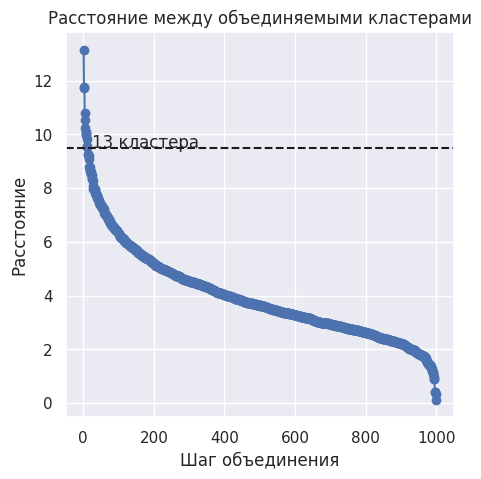

In [ ]:
#  Добавляем уровни, на которых останавливаем объединение

dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')
plt.axhline(9.5, c='k', linestyle='dashed')
plt.text(25, 9.5, '13 кластера')


более одекватно  если будет 15 сластер

In [ ]:
fig = ff.create_dendrogram(X_2, linkagefun=lambda x: complete_clustering,color_threshold = 10.3,labels= X_2.index.tolist())
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

In [ ]:
tab = pd.crosstab(X.personal_status,df['cluster'])
tab

cluster             1   2   3   4   5   6   7   8   9    10   11  12   13
personal_status                                                          
female div/dep/mar   7   4   7  78  13   6   1   0  27  113   13   2   39
male div/sep         0   0   2   8   1   0   0   0   9   18    5   0    7
male mar/wid         0   4   3  27   4   0   1   0   9    6   15   2   21
male single          0  44  29  87  35  18   6  12  49    5  120  32  111

In [ ]:
tab = pd.crosstab([X.job,X.age],df['cluster'])
tab

cluster                        1   2   3   4   5   6   7   8   9   10  11  12  \
job                       age                                                   
high qualif/self emp/mgmt 20    0   0   0   1   0   0   0   0   0   0   0   0   
                          23    0   0   0   0   0   1   0   0   0   1   0   0   
                          24    0   0   1   0   0   0   0   0   0   0   0   0   
                          25    0   0   0   0   0   0   0   0   0   0   1   0   
                          26    0   0   0   3   1   0   0   0   1   0   0   0   
...                            ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
skilled                   63    0   1   0   1   2   0   0   1   0   0   1   0   
                          64    0   0   0   1   0   0   0   0   0   1   0   0   
                          65    0   2   0   0   0   0   0   0   0   0   0   0   
                          67    0   1   0   0   0   0   0   0   0   0   0   0   
                          68    0   0   0   0   0   0   0   0   0   0   1   0   

cluster                        13  
job                       age      
high qualif/self emp/mgmt 20    0  
                          23    0  
                          24    0  
                          25    0  
                          26    0  
...                            ..  
skilled                   63    0  
                          64    1  
                          65    1  
                          67    1  
                          68    0  

[149 rows x 13 columns]

#DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import  KMeans,DBSCAN
# silhouette_score for evaluating the clusters, ranges from -1 to +1, desirable score is close to 1
from sklearn.metrics import silhouette_score

In [ ]:
nn = NearestNeighbors(n_neighbors=20).fit(X_2)
distances, indices = nn.kneighbors(X_2)

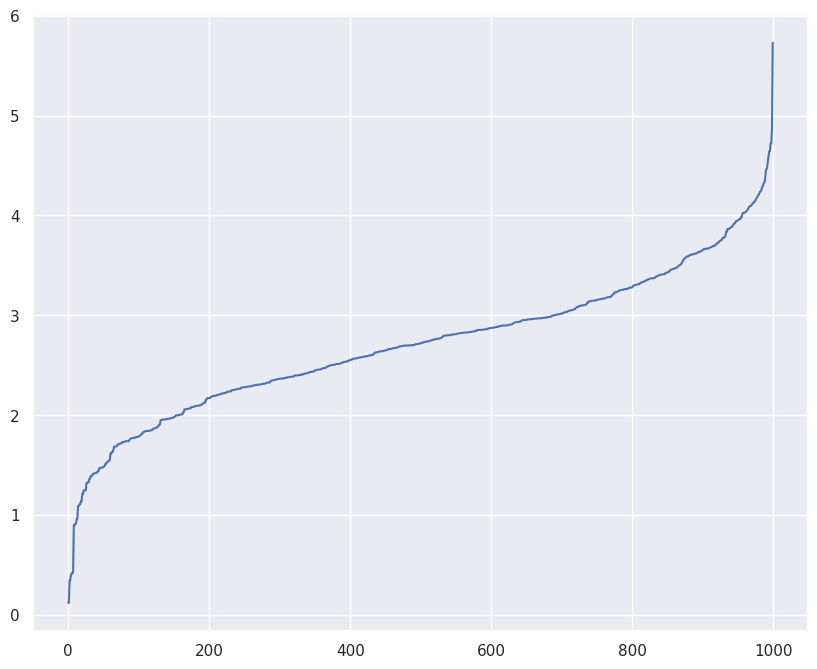

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [ ]:
min_samples = range(5,21)
eps = np.arange(3.5,4.5,0.01)

In [ ]:
output = []

for ms in min_samples:
    for ep in eps:

      labels = DBSCAN(min_samples=ms, eps = ep).fit(X_2).labels_
      score = silhouette_score(X_2, labels)
      output.append((ms, ep, score))

In [ ]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.21949968170458606
min_samples: 5
eps: 4.469999999999979


In [ ]:
from collections import Counter
labels = DBSCAN(min_samples=1, eps = eps).fit(X_2).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(X_2, labels)}")

Number of clusters: 10
Number of outliers: 0
Silhouette_score: 0.0038442877494683065


In [ ]:
from collections import Counter
labels = DBSCAN(min_samples=5, eps = eps).fit(X_2).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(X_2, labels)}")

Number of clusters: 2
Number of outliers: 10
Silhouette_score: 0.21949968170458606


In [ ]:
df["dbscan_cluster"]=labels

In [ ]:
df.groupby("dbscan_cluster").mean()

duration  credit_amount  installment_commitment  \
dbscan_cluster                                                    
-1              1.526369       2.537333               -0.244152   
 0             -0.015418      -0.025630                0.002466   

                residence_since       age  existing_credits  num_dependents  \
dbscan_cluster                                                                
-1                     0.049857  0.725960          0.507477        0.400658   
 0                    -0.000504 -0.007333         -0.005126       -0.004047   

                checking_status  credit_history  purpose  ...  employment  \
dbscan_cluster                                            ...               
-1                     1.400000        2.700000  3.00000  ...    2.000000   
 0                     0.806061        2.214141  4.49899  ...    1.520202   

                personal_status  other_parties  property_magnitude  \
dbscan_cluster                                                       
-1                     1.900000       2.000000            1.500000   
 0                     1.877778       1.864646            1.384848   

                other_payment_plans   housing       job  own_telephone  \
dbscan_cluster                                                           
-1                         0.500000  0.900000  1.000000            0.8   
 0                         0.912121  1.072727  1.276768            0.4   

                foreign_worker   cluster  
dbscan_cluster                            
-1                    0.900000  5.200000  
 0                    0.963636  8.321212  

[2 rows x 21 columns]

In [ ]:
#  Таблица сопряженности для двух кластеризаций
tab = pd.crosstab(df['cluster'],df['dbscan_cluster'])
print(tab)

dbscan_cluster  -1    0
cluster                
1                2    5
2                1   51
3                2   39
4                0  200
5                0   53
6                0   24
7                0    8
8                3    9
9                2   92
10               0  142
11               0  153
12               0   36
13               0  178


ни очень получилось кластеризовать (DBSCAN)

Text(0.5, 1.0, 'Clusters determined by DBSCAN')

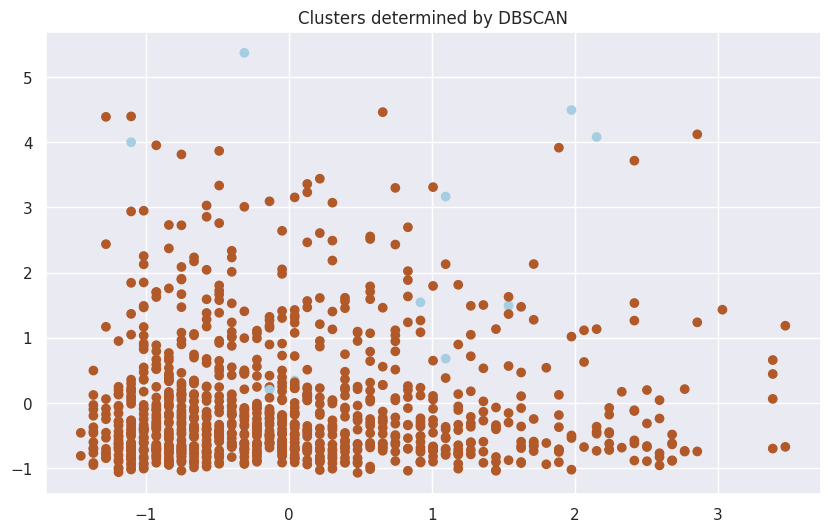

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["age"], df["credit_amount"],c=labels, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

DBSCAN -->num_cols

In [ ]:
nn = NearestNeighbors(n_neighbors=20).fit(X_2[num_cols])
distances, indices = nn.kneighbors(X_2[num_cols])

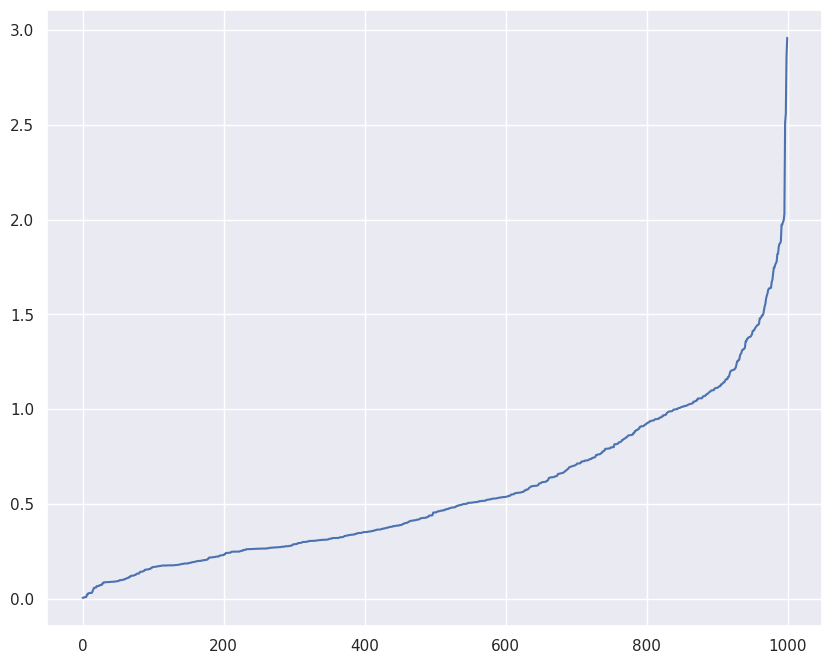

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [ ]:
min_samples = range(5,21)
eps = np.arange(0.9,1.5,0.01)

In [ ]:
output = []

for ms in min_samples:
    for ep in eps:

      labels = DBSCAN(min_samples=ms, eps = ep).fit(X_2[num_cols]).labels_
      score = silhouette_score(X_2[num_cols], labels)
      output.append((ms, ep, score))

In [ ]:
min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.1371049036108501
min_samples: 7
eps: 1.4100000000000006


In [ ]:

labels = DBSCAN(min_samples=min_samples, eps = eps).fit(X_2[num_cols]).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(X_2, labels)}")

Number of clusters: 5
Number of outliers: 137
Silhouette_score: 0.031842602250366545


In [ ]:
df_num=df[num_cols]
df_num["dbscan_num_cluster"]=labels

In [ ]:
tab = pd.crosstab(df['cluster'],df_num["dbscan_num_cluster"])
tab

dbscan_num_cluster  -1   0    1   2   3
cluster                                
1                    7   0    0   0   0
2                   11  30   11   0   0
3                   29   4    8   0   0
4                    5  43  135  16   1
5                    6  17   26   4   0
6                   16   3    4   0   1
7                    5   3    0   0   0
8                   10   0    2   0   0
9                    8  43   33   5   5
10                   4  37  100   1   0
11                  17  40   86   8   2
12                   4   0    1  14  17
13                  15  39   94  14  16

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=10)
X_tsne = tsne.fit_transform(X_2)
X_tsne.shape

(1000, 2)

In [ ]:

linkage_ = linkage(X_tsne, method="average", metric="euclidean")


In [ ]:
fig = ff.create_dendrogram(X_tsne, linkagefun=lambda x: linkage_,color_threshold = 18,labels= X_2.index.tolist())
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

In [ ]:
df['cluster_tsne'] = fcluster(linkage_ , 18, criterion='distance')

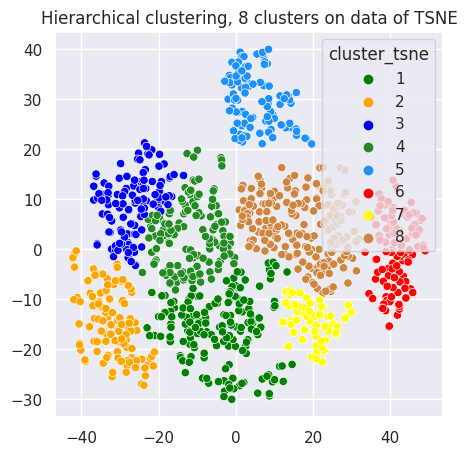

In [ ]:
plt.title('Hierarchical clustering, 8 clusters on data of TSNE')
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=df['cluster_tsne'],  palette=['green','orange','blue',
                                                                                      'forestgreen','dodgerblue','red', 'yellow' , 'peru']);

In [ ]:
linkage_ = linkage(X_2, method="complete", metric="euclidean")
fig = ff.create_dendrogram(X_2, linkagefun=lambda x: linkage_,color_threshold = 9.5,labels= X_2.index.tolist())
fig.update_layout(autosize=True, hovermode='closest')
fig.update_xaxes(mirror=False, showgrid=True, showline=False, showticklabels=False)
fig.update_yaxes(mirror=False, showgrid=True, showline=True)
fig.show()

In [ ]:
df['cluster_tsne_1'] = fcluster(linkage_ , 9.5, criterion='distance')

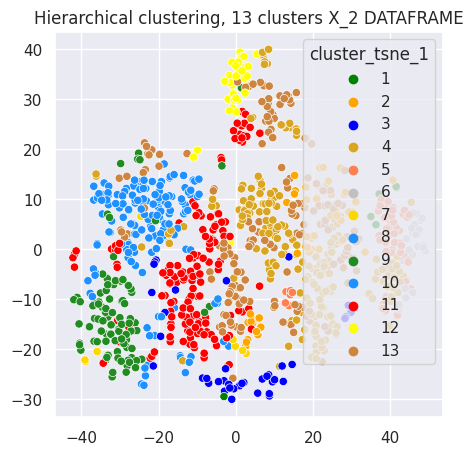

In [ ]:
plt.title('Hierarchical clustering, 13 clusters X_2 DATAFRAME')
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=df['cluster_tsne_1'],  palette=['green','orange','blue','goldenrod', 'coral' ,
                                                                                        'silver' , 'gold' , 'dodgerblue',
                                                                                        'forestgreen','dodgerblue','red', 'yellow' , 'peru']);

In [ ]:
from tqdm import tqdm
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_2)
    labels = agg.labels_
    score = silhouette_score(X_2, labels)
    silhouette.append(score)

100%|██████████| 9/9 [00:01<00:00,  5.99it/s]


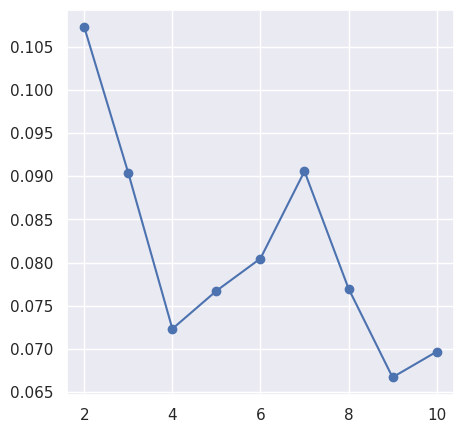

In [ ]:
plt.plot(range(2,11), silhouette, marker='o')

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters = 7).fit(X_2)
labels_agg = agg_cluster.labels_

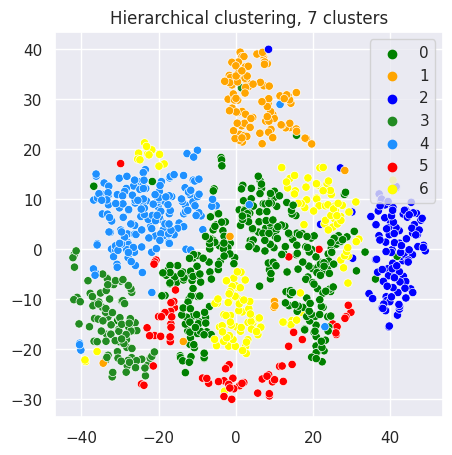

In [ ]:
plt.title('Hierarchical clustering, 7 _clusters')
sns.scatterplot(x = X_tsne[:, 0], y = X_tsne[:, 1], hue=agg_cluster.labels_,  palette=['green','orange','blue',
                                                                                       'forestgreen','dodgerblue','red', 'yellow' ,]);

In [ ]:
from tqdm import tqdm

In [ ]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████| 60/60 [00:08<00:00,  7.24it/s]


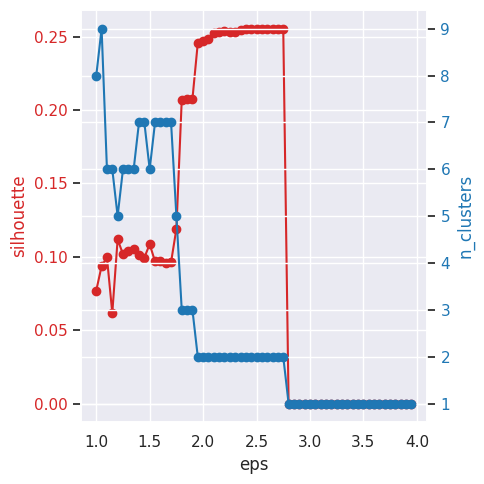

In [ ]:
eps_range = np.arange(1,4,0.05)
dbscan_clustering(eps_range, X_2[num_cols])

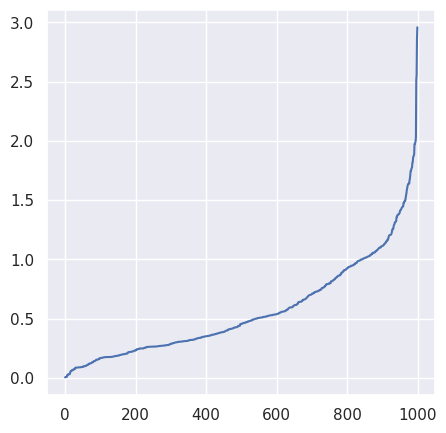

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X_2[num_cols])
distances, indices = nbrs.kneighbors(X_2[num_cols])

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)

In [ ]:
dbscan = DBSCAN(eps=1.7, min_samples=10).fit(X_2[num_cols])
labels_dbscan = dbscan.labels_

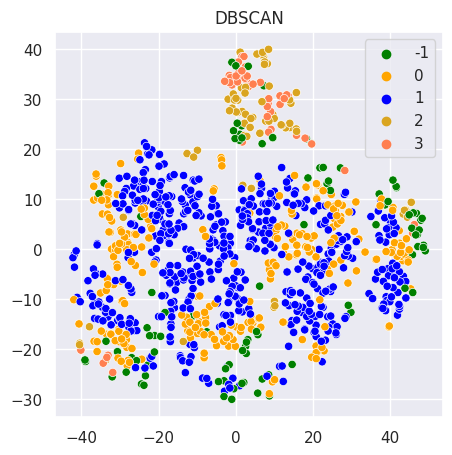

In [ ]:
plt.title('DBSCAN')
sns.scatterplot(x = X_tsne[:,0], y = X_tsne[:,1], hue=labels_dbscan, palette=['green','orange','blue','goldenrod', 'coral' ,
                                                                                       ]);

In [ ]:
pd.DataFrame(labels_dbscan).value_counts()

 1    525
 0    263
-1     99
 2     67
 3     46
dtype: int64

In [ ]:
#@title Гиперпараметры tSNE {run: "auto" }
n_iter = 350 #@param {type:"slider", min:250, max:500, step:25}
perplexity = 50 #@param {type:"slider", min:5, max:50, step:5}

# создаем объект класса с указанием гиперпараметров
tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=perplexity,
            n_iter=n_iter, )

# обучаем и сразу трансформируем
# потому что это t-SNE
# и чисто "математически" нельзя отдельно fit и transform
tsne_results = tsne.fit_transform(X_2[num_cols])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.893619
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.813904
[t-SNE] KL divergence after 350 iterations: 0.746235


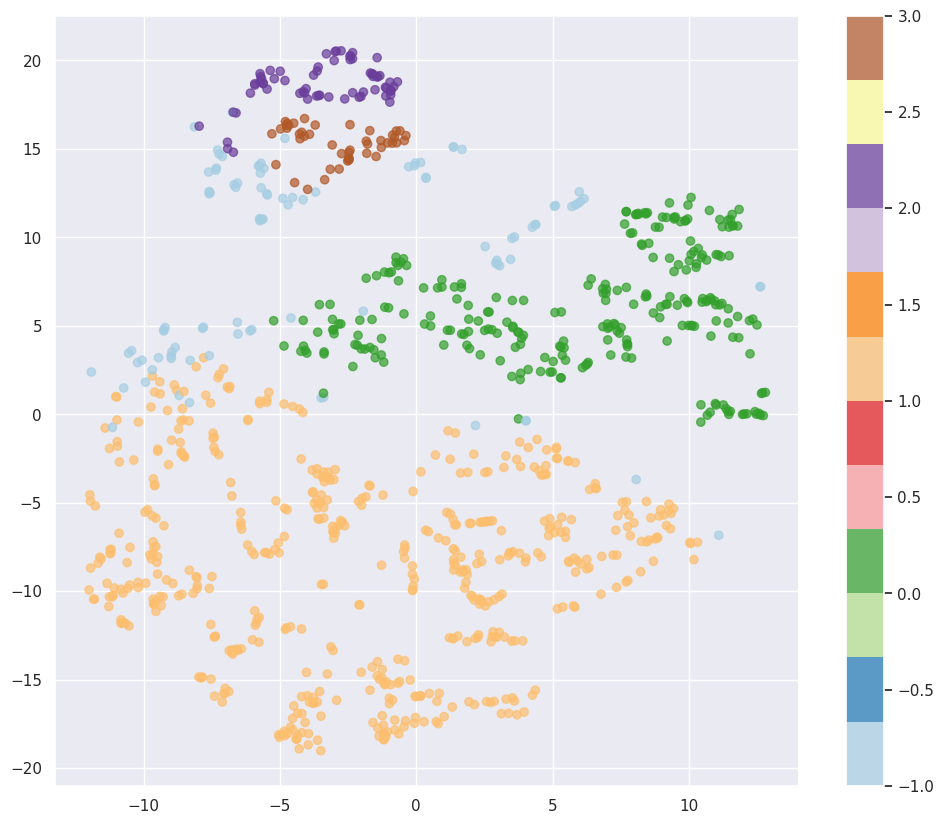

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1],
            c =labels_dbscan, # подсцветим по типу трансмиссии
            alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();

In [ ]:
tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=35,
            n_iter=400)

# обучаем и сразу трансформируем
# потому что это t-SNE
# и чисто "математически" нельзя отдельно fit и transform
tsne_results = tsne.fit_transform(X_2[num_cols])

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.070s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.803287
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.803993
[t-SNE] KL divergence after 400 iterations: 0.687235


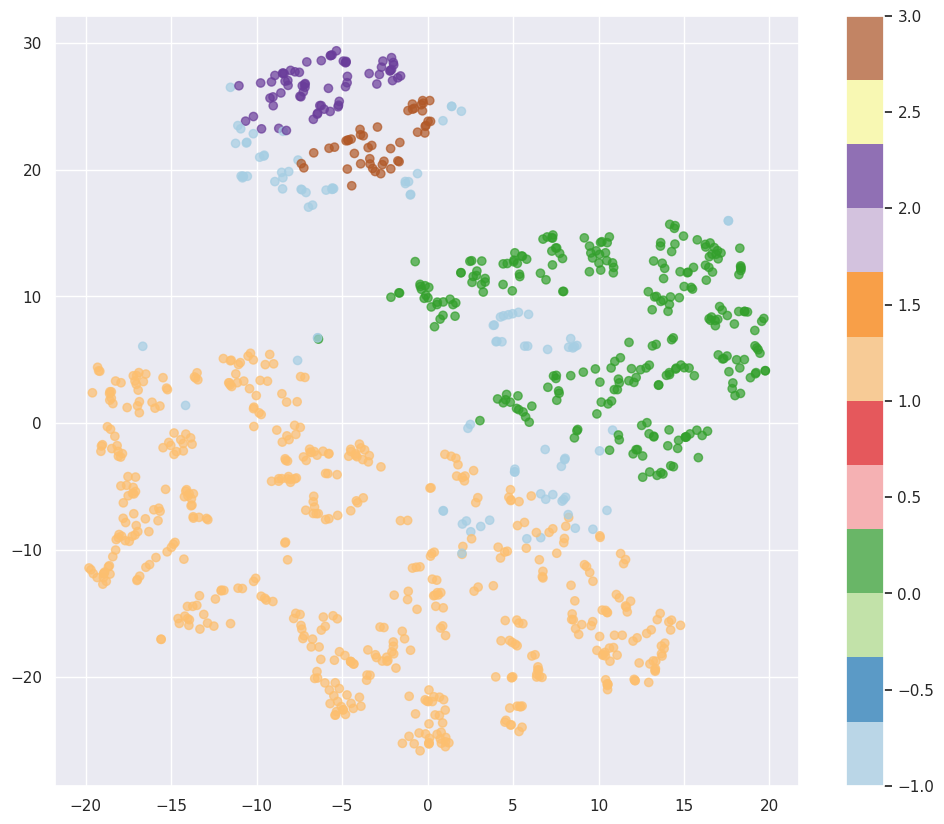

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1],
            c =labels_dbscan, # подсцветим по типу трансмиссии
            alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();